<center><h1>Analyse du ShellSort</h1></center>

Dans ce document nous analyser les résultats de l'algorithme ShellSort qui est une amelioration du tri par insertion, afin de déterminer les conditions dans lesquelles l'algorithme est le plus performant.

## Analyse théorique 

Avant d'analyser le résultat de nos expérimentations sur cet algorithme, nous allons étudier la complexité du ShellSort.

Algorithme ShellSort :
    

    fonction ShellSort(tableau T, taille N):
        // On crée les gaps de tri
        gaps = []
        gap = 1
        Tant que gap < N Faire
            gaps.add(gap)
            gap *= 2.3
            gap = round(gap)
            
        // Pour tous les gaps
        Pour i allant de longueur(gaps)-1 à 0 Faire
        
        Pour j allant de gaps[i] à N-1 Faire
            temp = T[j]
      // Fait un tri par insertion sur entre les éléments
         espacés de gaps[i]
             k = j
             // On deplace vers la gauche les éléments plus grand
             Tant que k >= gaps[i] et T[k - gaps[i]]> temp Faire
                 T[k] = T[k-gaps[i]]
                 k -= gaps[i]
             // On comble le trou qu'on a créé
             T[k] = temp
                    

## Analyse des résultats de ShellSort

Dans cette partie nous allons analyser l'efficacité constatée de l'algorithme ShellSort.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import odr
import time

### Tri de int

On importe dans la cellule suivante les données et on nomme les colonnes.

In [2]:
data = pd.read_csv('result_data/ShellSort.csv',sep=',')# On récupère les données correspondantes
print("Fichier lu")

data.columns = ["NumberElements","NombreEchangeRd",
                     "NombreComparaisonRd","TempsMSRd","NombreEchange1_2",
                     "NombreComparaison1_2","TempsMS1_2","NombreEchangeStart25",
                     "NombreComparaisonStart25","TempsMSStart25",
                     "NombreEchangeStart50","NombreComparaisonStart50",
                     "TempsMSStart50","NombreEchangeEnd25",
                     "NombreComparaisonEnd25","TempsMSEnd25",
                     "NombreEchangeEnd50","NombreComparaisonEnd50",
                     "TempsMSEnd50","NombreEchangeSorted",
                     "NombreComparaisonSorted","TempsMSSorted"]

Fichier lu


#### En particulier

On va comparer les temps d'exécution, le nombre de comparaisons, d'échanges, pour un grand nombre n afin de voir s'il y a un cas de désordre désavantageux.

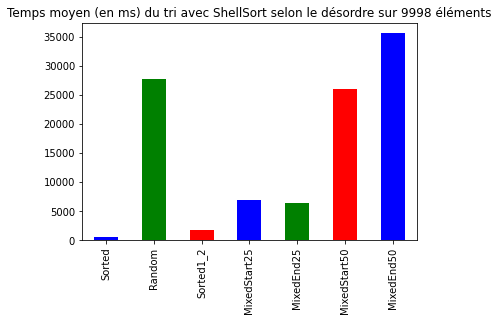

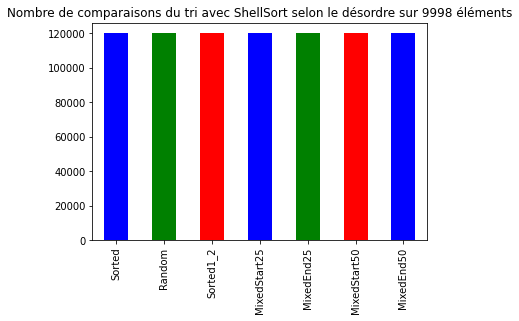

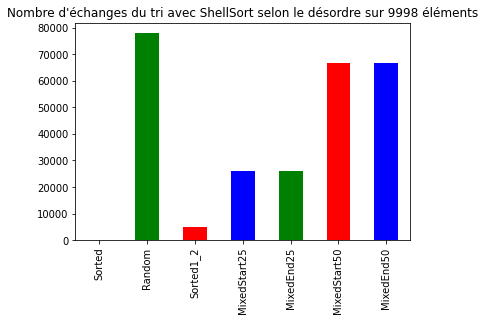

In [3]:
NomAlgorithme = "ShellSort"
n = 9998
vitesseDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'TempsMSSorted'],
    'Random' : data.loc[:,'TempsMSRd'],
    'Sorted1_2': data.loc[:,'TempsMS1_2'],
    'MixedStart25': data.loc[:,'TempsMSStart25'],
    'MixedEnd25': data.loc[:,'TempsMSEnd25'],
    'MixedStart50': data.loc[:,'TempsMSStart50'],
    'MixedEnd50': data.loc[:,'TempsMSEnd50']
})

echangesDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreEchangeSorted'],
    'Random' : data.loc[:,'NombreEchangeRd'],
    'Sorted1_2': data.loc[:,'NombreEchange1_2'],
    'MixedStart25': data.loc[:,'NombreEchangeStart25'],
    'MixedEnd25': data.loc[:,'NombreEchangeEnd25'],
    'MixedStart50': data.loc[:,'NombreEchangeStart50'],
    'MixedEnd50': data.loc[:,'NombreEchangeEnd50']
})

comparaisonsDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreComparaisonSorted'],
    'Random' : data.loc[:,'NombreComparaisonRd'],
    'Sorted1_2': data.loc[:,'NombreComparaison1_2'],
    'MixedStart25': data.loc[:,'NombreComparaisonStart25'],
    'MixedEnd25': data.loc[:,'NombreComparaisonEnd25'],
    'MixedStart50': data.loc[:,'NombreComparaisonStart50'],
    'MixedEnd50': data.loc[:,'NombreComparaisonEnd50']
})

finalCmpDF = pd.DataFrame({
    'Comparaisons': comparaisonsDF.loc[n,vitesseDF.columns != 'Elements']
})
finalTimeDF = pd.DataFrame({
    'Temps': vitesseDF.loc[n,vitesseDF.columns != 'Elements']
})
finalExDF = pd.DataFrame({
    'Echanges': echangesDF.loc[n,echangesDF.columns != 'Elements']
})

plt.figure()

finalTimeDF['Temps'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Temps moyen (en ms) du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalCmpDF['Comparaisons'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre de comparaisons du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalExDF['Echanges'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre d'échanges du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

Ici, on observe qu'en moyenne l'algorithme ShellSort n'est pas plus efficace si le désordre et au début ou à la fin dans la mesure où le nombre d'échanges et de comparaisons pour End25 et Start25 sont similaires.
De plus l'algorithme est très efficace lorsque le tableau est mélangé une fois sur deux, puisqu'il n'a qu'à faire un échange par élément désordonné. Contrairement à la situation où tout le tableau est désordonné.

#### Comportement par rapport aux quantités de données

Dans cette partie, nous allons observer comment le temps d'exécution évolue si l'on augmente la taille de l'échantillon à trier toujours selon le désordre.

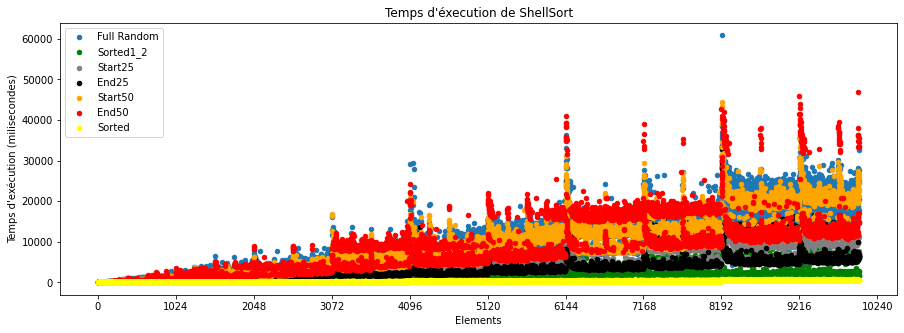

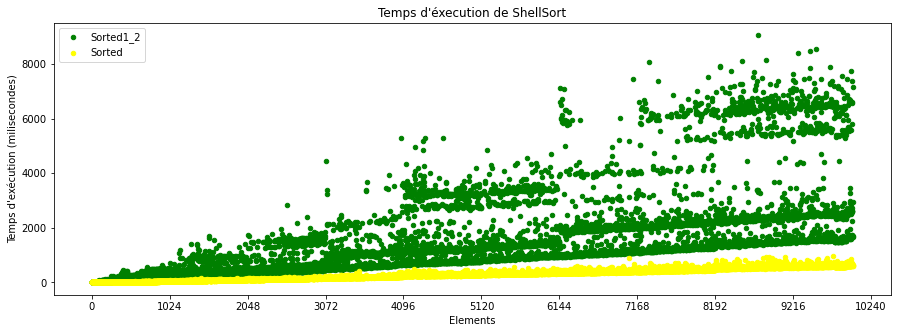

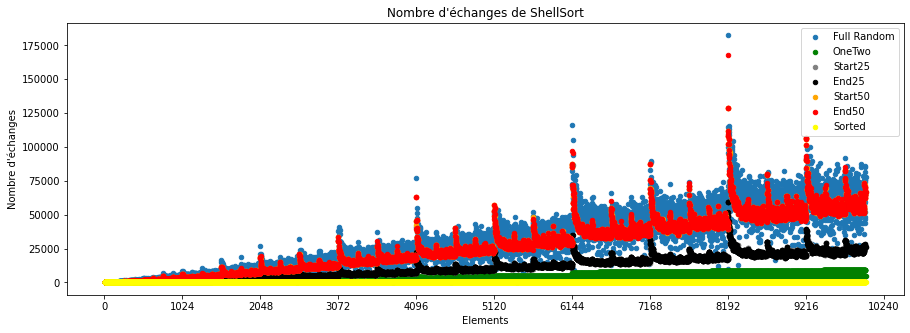

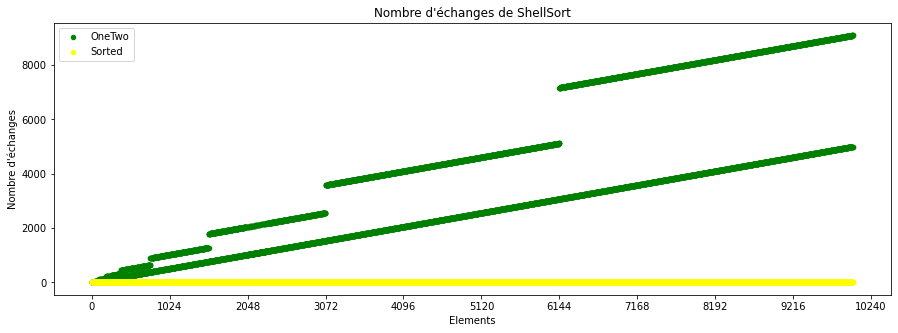

In [4]:
# solution trouvée sur https://stackoverflow.com/questions/13872533/how-to-plot-different-groups-of-data-from-a-dataframe-into-a-single-figure
x = vitesseDF['Elements']
fig = vitesseDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.xticks(np.arange(0, max(x)+1024, 1024.0))

plt.show()


fig = vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.xticks(np.arange(0, max(x)+1024, 1024.0))
plt.show()

fig = echangesDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.xticks(np.arange(0, max(x)+1024, 1024.0))
plt.show()

fig = echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.xticks(np.arange(0, max(x)+1024, 1024))
plt.show()

On constate à l'aide de ce nuage de points que lorsque la quantité de données est très grande le ShellSort prend un temps $nlog(n)$ où n est la taille de l'échantillon (ici en rouge et orange pour la moitié du tableau désordonné).

Néanmoins, on remarque que tous les 1024 le temps d'exécution change de "palier" et ce pour tous les cas de mélanges, on observera par la suite cette différence.

De plus, on remarque que lorsque les éléments sont triés une fois sur deux (ici en vert) le temps d'exécution croît de manière linéaire environ puisqu'il y a toujours cet effet de "palier".

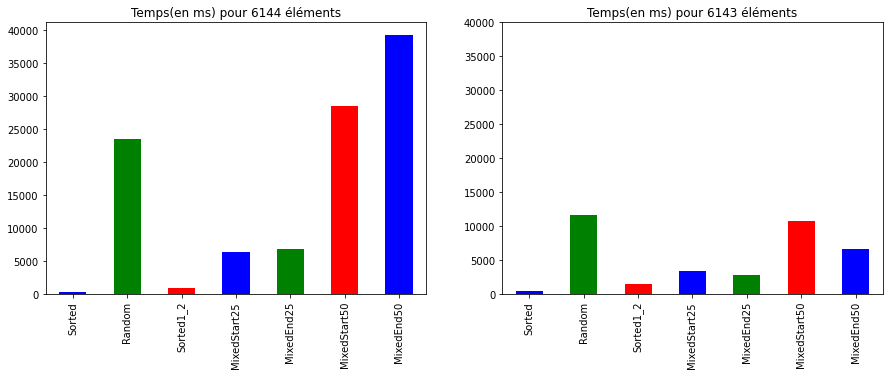

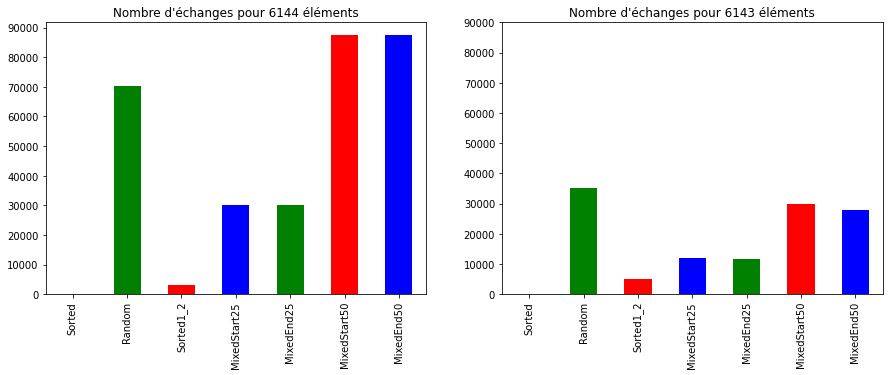

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
TimeDF6144 = pd.DataFrame({
    'Temps': vitesseDF.loc[6142,vitesseDF.columns != 'Elements']
})

TimeDF6143 = pd.DataFrame({
    'Temps': vitesseDF.loc[6141,vitesseDF.columns != 'Elements']
})
ExDF6144 = pd.DataFrame({
    'Echanges': echangesDF.loc[6142,echangesDF.columns != 'Elements']
})

ExDF6143 = pd.DataFrame({
    'Echanges': echangesDF.loc[6141,echangesDF.columns != 'Elements']
})

plt.subplot(121)
TimeDF6144['Temps'].plot(kind = "bar", color = ['b','g','r'],figsize=(15, 5))
plt.title("Temps(en ms) pour 6144 éléments")
plt.yticks(np.arange(0, max(TimeDF6144['Temps'])+5000, 5000))
plt.subplot(122)
plt.subplots_adjust(hspace=5)
TimeDF6143['Temps'].plot(kind = "bar", color = ['b','g','r'])
plt.yticks(np.arange(0, max(TimeDF6144['Temps'])+5000, 5000))
plt.title("Temps(en ms) pour 6143 éléments")
plt.show()

plt.subplot(121)
ExDF6144['Echanges'].plot(kind = "bar", color = ['b','g','r'],figsize=(15, 5))
plt.title("Nombre d'échanges pour 6144 éléments")
plt.yticks(np.arange(0, max(ExDF6144['Echanges'])+10000, 10000))
plt.subplot(122)
ExDF6143['Echanges'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre d'échanges pour 6143 éléments")
plt.yticks(np.arange(0, max(ExDF6144['Echanges'])+10000, 10000))
plt.show()

plt.figure()


Ici on remarque que pour un élément supplémentaire le nombre d'échanges explose. Cela s'explique par le fait que 6144 est un multiple de 1024.
L'augmentation est due 

In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html
# L'idée est ici de se représenter sous forme de fonction l'écart approximatif
# entre chacun de nos résultats pour une même taille de donnée

poly_model = odr.polynomial(2)

dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du temps d'exécution du ShellSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* 0.05286091629565453  + n² * 1.16446828301423e-06

Fonction d'approximation du temps d'exécution du ShellSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* 0.8014534394081302  + n² * 0.00017508014517905325

Fonction d'approximation du temps d'exécution du ShellSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -0.17499951901367242  + n² * 0.0002709311114854253



Ici, on aperçoit que lorsque le tableau est déjà trié le temps est assez linéaire, tandis que, lorsque le nombre d'éléments désordonnés augmentent on tend à augmenter le facteur de n².

Nous allons voir si on constate ce changement au niveau du nombre d'échanges.


In [7]:
dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du nombre d'échanges du ShellSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* -2.643963534628842e-166  + n² * 3.424169316957562e-170

Fonction d'approximation du nombre d'échanges du ShellSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* 2.9363530275248877  + n² * 0.0005049356611223735

Fonction d'approximation du nombre d'échanges du ShellSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* 2.8868481605376157  + n² * 0.00039449412382517587



Dans ces approximations, on retrouve d'abord que le nombre d'échanges pour le tableau trié est de 0 environ.
Et on remarque qu'avec notre échantillon de données l'augmentation de l'importance du terme en n² est due à l'augmentation présente pour le nombre d'échanges.

## Bilan

Après avoir analysé l'algorithme ShellSort dans chacune des situations que nous avons expérimentées, nous proposons d'observer un diagramme en boîte nous permettant de déterminer quel est le pire cas d'utilisation et le meilleur cas d'utilisation de l'algorithme.

              Temps
Sorted          630
Random        27658
Sorted1_2      1689
MixedStart25   6966
MixedEnd25     6366
MixedStart50  25905
MixedEnd50    35588


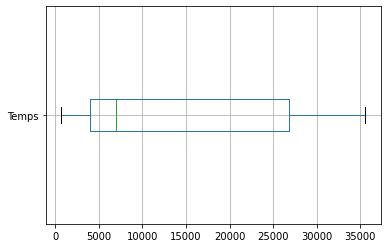

La meilleure des situations pour ShellSort est lorsqu'il tri un tableau mélangé avec l'algorithme Sorted de mélange.
La pire des situations pour ShellSort est lorsqu'il tri le tableau mélangé avec l'algorithme MixedEnd50 de mélange.
              Echanges
Sorted               0
Random           77949
Sorted1_2         5000
MixedStart25     25950
MixedEnd25       25950
MixedStart50     66769
MixedEnd50       66769


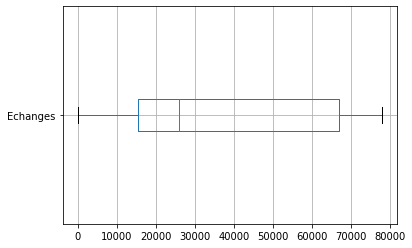

              Comparaisons
Sorted              120005
Random              120005
Sorted1_2           120005
MixedStart25        120005
MixedEnd25          120005
MixedStart50        120005
MixedEnd50          120005


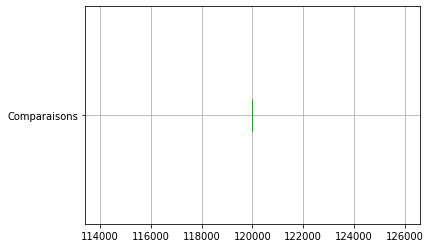

In [8]:
def findMaxRowColumnName(df):
    maximumRowsName = df.idxmax()
    return maximumRowsName

def findMinRowColumnName(df):
    minimumRowsName = df.idxmin()
    return minimumRowsName
minimum = findMinRowColumnName(finalTimeDF)
maximum = findMaxRowColumnName(finalTimeDF)

finalTimeDF.boxplot(vert = False)
print(finalTimeDF)
plt.show()

print("La meilleure des situations pour " + NomAlgorithme +
      " est lorsqu'il tri un tableau mélangé avec l'algorithme", minimum[0],"de mélange.")
print("La pire des situations pour " + NomAlgorithme + " est lorsqu'il tri le tableau mélangé avec l'algorithme", maximum[0],"de mélange.")

finalExDF.boxplot(vert = False)
print(finalExDF)
plt.show()
finalCmpDF.boxplot(vert = False)
print(finalCmpDF)

Pour conclure, nous pouvons dire que l'algorithme ShellSort est au maximum de son efficacité lorsque le tableau a un désordre de type :  un élément sur deux triés. De plus, plus la taille de l'échantillon s'approche d'un multiple de 1024 tout en restant inférieur à lui plus l'algorithme est efficace.

Cependant, l'algorithme prend un temps énorme lorsque l'on est proche mais supérieur à un multiple de 1024 cela s'explique par la grande augmentation du nombre d'échanges.

La meilleure situation pour utiliser le ShellSort est lorsque l'échantillon de données est quasiment trié avec un échantillon de taille environnant $k*1024$ mais en étant inférieur, la pire des situations est lorsque le tableau est entièrement désordonné avec un échantillon de taille environnant $k*1024$ mais en étant supérieur à $k*1024$.